# Pre
## Loading the packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Defining Constants

In [3]:
# Current Units
A = 1
mA = 1e-3
uA = 1e-6

# Voltage Units
V = 1
mV = 1e-3
uV = 1e-6

# Power Units
W = 1
mW = 1e-3
uW = 1e-6

## Define useful function

# Plotting

In [21]:
# Loading the files
file_path = 'Data/500 kHz.csv'
data = pd.read_csv(file_path, header=0)

# # Remap the TIME column values from the old range to the new range [0, 10]
data['TIME'] = data['TIME'].apply(lambda x: 10 * ((x - (-5e-6)) / (5e-6 - (-5e-6))))

# # Normalize CH2 and CH3 columns to the range [0, 1]
data['CH2'] = (data['CH2'] - data['CH2'].min()) / (data['CH2'].max() - data['CH2'].min())
data['CH3'] = (data['CH3'] - data['CH3'].min()) / (data['CH3'].max() - data['CH3'].min())


In [22]:
data.to_csv('Data/500 kHz modified.csv', index=False)

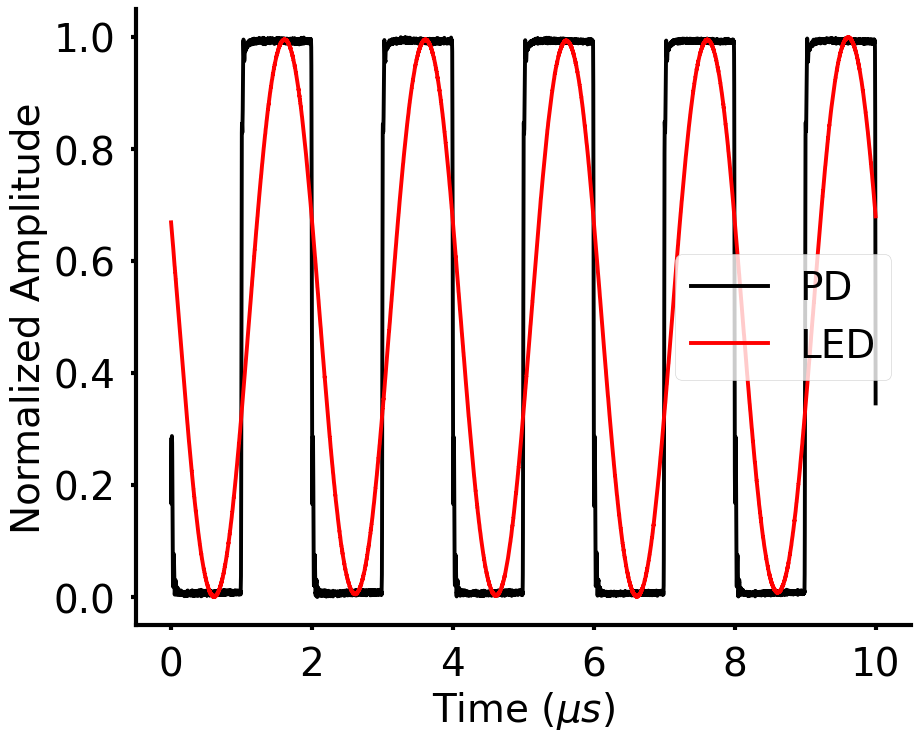

In [23]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(data['TIME'], data['CH3'], color='black', label='PD')
ax.plot(data['TIME'], data['CH2'], color='red', label='LED')

ax.legend(fontsize=28)

ax.set_ylabel('Normalized Amplitude', fontsize=28)
ax.set_xlabel(r'Time ($\mu s$)', fontsize=28)

ax.tick_params(axis='both', labelsize=28, width=3)

# Increase the line thickness of the bounding box
for spine in ax.spines.values():
    spine.set_linewidth(3)

# Remove splines on top and right sides
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
# Add splines on left and bottom sides
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.savefig('Figures/500 kHz.pdf', bbox_inches='tight')
plt.show()


# Analysis
## Power consumption
Calculating the power use for a single unit measured using a micro-amm meter in the measurements

In [13]:
# Currents under different conditions
off_current_plus = 829 * uA
on_current_plus = 917 * uA

off_current_minus = 829 * uA
on_current_minus = 917 * uA

# Voltages under different conditions
plus_volt = 2.5 * V
minus_volt = 2.5 * V

# Calculate the difference in current
diff_current = on_current - off_current

# Calculate tht total power use
on_power = (on_current * plus_volt) + (on_current * minus_volt)
off_power = (off_current * plus_volt) + (off_current * minus_volt)
diff_power = on_power - off_power

# Print the results
print('Current Difference: {:.3f} mA'.format(diff_current / mA))
print('Power Difference: {:.3f} mW'.format(diff_power / mW))

Current Difference: 0.088 mA
Power Difference: 0.440 mW


Repeating the measurement and extending it to 64 LEDs